In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1) Pre-processing - 
remove all edges with weight < 3 and all the nodes with degree 0

In [68]:
### load the graph to var G
G = nx.read_gexf('net_il2015-2018.gexf')
### remove all edges with weight < 3
edges_to_remove =[]
for (u,v) in  G.edges:
    if G.edges[u, v]['weight'] <3:
        edges_to_remove.append([u,v])
G.remove_edges_from(edges_to_remove)

### remove all nodes with degree 0 
nodes_to_remove =[]
for u in G.nodes:
    if G.degree(u)== 0:
        nodes_to_remove.append(u)
G.remove_nodes_from(nodes_to_remove)

print G.number_of_edges()
print G.number_of_nodes()

Eli Cohen
807
102


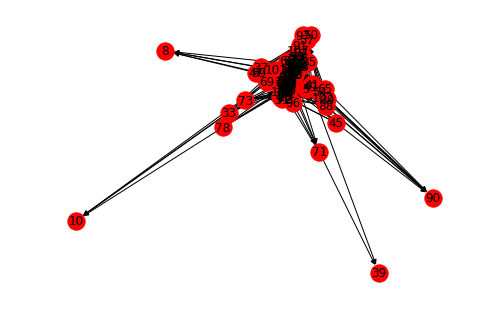

In [38]:
nx.draw_spring(G, with_labels=True)

2) calculate : clustering coefficient, diameter, density  
[TODO: explain what we can infer from those Properties about our graph] 

In [3]:
density = nx.density(G)
print density 
udG = G.to_undirected()
diameter = nx.diameter(udG)
print diameter
clustering_coefficient = nx.clustering(G)
print clustering_coefficient

0.0783343040186
4
{'25': 0.5, '26': 0.14512195121951219, '27': 0.35555555555555557, '20': 0.20348837209302326, '21': 0.2857142857142857, '22': 0.25, '23': 0.30357142857142855, '28': 0.3790849673202614, '29': 0.44642857142857145, '4': 0.35454545454545455, '8': 0.15, '59': 0.2481060606060606, '58': 0.2636363636363636, '55': 0.3188405797101449, '54': 0.2857142857142857, '57': 0.08695652173913043, '56': 0.11818181818181818, '51': 0.5, '50': 0, '53': 0.2830687830687831, '52': 0.2803030303030303, '88': 0.17777777777777778, '89': 0.26785714285714285, '82': 0.2723076923076923, '80': 0, '81': 0.29044117647058826, '86': 0.2777777777777778, '87': 0.42857142857142855, '84': 0.3409090909090909, '85': 0, '3': 0.39285714285714285, '7': 0.22894736842105262, '108': 0.35, '109': 0.2619047619047619, '102': 0.2727272727272727, '103': 0.2916666666666667, '100': 0.1398989898989899, '101': 0.24183006535947713, '107': 0, '104': 0.3888888888888889, '39': 0, '38': 0.179421768707483, '33': 0.16666666666666666, '

3. find top-10 ministers for each Centralization degree that has been learned in class and describe what each degree means in the context of the current network :*indegree ; *outdegree ; *betweenness ; *closness 

In [18]:
in_degree_centrality = nx.in_degree_centrality(G)
print "indegree centrality "
sorted(in_degree_centrality.items() , key = lambda x :x[1] , reverse=True)[:10]

indegree centrality 


[('57', 0.6831683168316832),
 ('19', 0.6633663366336634),
 ('93', 0.46534653465346537),
 ('100', 0.42574257425742573),
 ('56', 0.40594059405940597),
 ('26', 0.36633663366336633),
 ('36', 0.297029702970297),
 ('38', 0.27722772277227725),
 ('30', 0.27722772277227725),
 ('32', 0.24752475247524752)]

In [19]:
out_degree_centrality = nx.out_degree_centrality(G)
print "outdegree centrality "
sorted(out_degree_centrality.items() , key = lambda x :x[1] , reverse=True)[:10]

outdegree centrality 


[('20', 0.33663366336633666),
 ('53', 0.27722772277227725),
 ('82', 0.25742574257425743),
 ('35', 0.22772277227722773),
 ('108', 0.2079207920792079),
 ('38', 0.2079207920792079),
 ('69', 0.2079207920792079),
 ('41', 0.19801980198019803),
 ('22', 0.18811881188118812),
 ('49', 0.18811881188118812)]

In [22]:
closeness_centrality = nx.closeness_centrality(G)
print "closeness centrality "
sorted(closeness_centrality.items() , key = lambda x :x[1] , reverse=True)[:10]

closeness centrality 


[('57', 0.7166031987814165),
 ('19', 0.6812824139556812),
 ('93', 0.5896913220733838),
 ('100', 0.5213536279001034),
 ('56', 0.5151734685663688),
 ('30', 0.4981477739610696),
 ('17', 0.4449342194493422),
 ('26', 0.41865436543654366),
 ('11', 0.3895753211684805),
 ('7', 0.36431307364313076)]

In [36]:
betweenness_centrality = nx.betweenness_centrality(G)
print "betweenness centrality "
sorted(betweenness_centrality.items() , key = lambda x :x[1] , reverse=True)[:10]

betweenness centrality 


[('38', 0.026435855123973933),
 ('59', 0.018487768831828243),
 ('92', 0.01808641303690809),
 ('49', 0.014555099191237805),
 ('14', 0.013044699524897545),
 ('20', 0.012988164750540989),
 ('36', 0.007371404997642622),
 ('76', 0.007029848039749031),
 ('79', 0.005946750444275198),
 ('101', 0.005935997171145686)]

In [27]:
eigenvector_centrality = nx.eigenvector_centrality(udG)
print "eigenvector centrality "
sorted(eigenvector_centrality.items() , key = lambda x :x[1] , reverse=True)[:10]

eigenvector centrality 


[('57', 0.23253577139218654),
 ('19', 0.22522809132284463),
 ('38', 0.22393906870767358),
 ('20', 0.21345286980354722),
 ('93', 0.20332379000298162),
 ('76', 0.19716045482325112),
 ('49', 0.1837117912393721),
 ('59', 0.1754495201447123),
 ('26', 0.17462015398334457),
 ('100', 0.17210116022372993)]

4.	בדקו האם יש קורלציה  בין מדדי המרכזיות השונים, האם ניתן לזהות מקרים חריגים? נסו לתת הסברים מה יכול לגרום להבדלים אלו (גורמים אפשריים לדוגמה: שייכות מפלגתית, קואליציה/אופיזיציה, תפקיד הח"כ (חבר ממשלה, יו"ר ועדה בכנסת וכדומה)

אפשר לראות קורלציה בין מדד הIndegre לבין מדד הcloseness.
המשמעות של קורלציה זו היא שח"כים מסויימים מהווים נקודת מפתח עבור תמיכה של ח"כים נוספים, כלומר תמיכתם בהצעה X משמעותה תמיכה של ח"כים נוספים באותה ההצעה.

5.	האם ניתן למצוא קהילות  ברשת? הציגו סטטיסטיקות רלוונטיות לקהילות השונות, האם ניתן לזהות קשר בין הקהילות למאפיינים אמיתיים כמו השייכות המפלגתית או קואליציה/אופיזיציה – הציגו נתונים מספריים מתאימים. 

6.	בהמשך לנקודה הקודמת האם מצאתם שיוכי ח"כים לקהילות שנראים  פחות הגיוניים? נסו לתת הסבר מדוע זה היה יכול לקרות לפי הקשרים בגרף.

7.	צרפו לדו"ח תרשים של הרשת הממחיש את החלוקה לקהילות ואת אחד ממדדי המרכזיות לבחירתכם. הסבירו בקצרה את מבנה התרשים. 

8.	השתמשו בשתי שיטותLink prediction  על מנת לזהות שיתופי פעולה פוטנציאלים עתידיים בין הח"כים השונים. הציגו את שיתופי הפעולה הסבירים ביותר. תארו האם לדעתכם התוצאות הגיוניות? אילו פילטרים נוספים הייתם משלבים על-מנת לסנן חלק מהתחזיות?

In [29]:
preds_jc = nx.jaccard_coefficient(udG)


pred_jc_dict = {}
for u, v, p in preds_jc:
    pred_jc_dict[(u,v)] = p

sorted(pred_jc_dict.items(), key=lambda x:x[1], reverse=True)[:10]

[(('107', '66'), 1.0),
 (('66', '91'), 1.0),
 (('50', '107'), 1.0),
 (('50', '66'), 1.0),
 (('50', '91'), 1.0),
 (('107', '91'), 1.0),
 (('4', '104'), 0.9090909090909091),
 (('4', '2'), 0.8461538461538461),
 (('53', '82'), 0.8),
 (('104', '2'), 0.7692307692307693)]

In [31]:
preds_pa = nx.preferential_attachment(udG)

pred_pa_dict = {}
for u, v, p in preds_pa:
    pred_pa_dict[(u,v)] = p

sorted(pred_pa_dict.items(), key=lambda x:x[1], reverse=True)[:10]

[(('57', '19'), 4692),
 (('93', '19'), 3264),
 (('57', '100'), 3105),
 (('26', '57'), 2829),
 (('36', '19'), 2244),
 (('56', '93'), 2160),
 (('19', '79'), 2108),
 (('57', '11'), 2070),
 (('57', '63'), 2001),
 (('26', '93'), 1968)]

In [33]:
preds_aa = nx.adamic_adar_index(udG)

pred_aa_dict = {}
for u, v, p in preds_aa:
    pred_aa_dict[(u,v)] = p

sorted(pred_aa_dict.items(), key=lambda x:x[1], reverse=True)[:10]

[(('57', '19'), 16.86292189338152),
 (('93', '19'), 12.80071502462538),
 (('26', '57'), 10.118470633902767),
 (('26', '93'), 9.10961924226769),
 (('57', '100'), 8.71500807286067),
 (('14', '49'), 8.668548680050838),
 (('19', '79'), 8.408444985311531),
 (('36', '19'), 8.013251233619751),
 (('26', '56'), 7.975861988132459),
 (('53', '82'), 7.1581624441787)]

9.	צרפו לדו"ח קובץ אקסל שבו לכל צומת יופיע שם הח"כ, שייכות מפלגתית, תוצאות מדדיי המרכזיות והשייכות לקהילה בגרף

In [125]:
in_degree = sorted(in_degree_centrality.items())
out_degree = sorted(out_degree_centrality.items())
between = sorted(betweenness_centrality.items())
close = sorted(closeness_centrality.items())
eigen = sorted(eigenvector_centrality.items())
nodes_data = sorted(list(G.nodes.data()))
for i in range(G.number_of_nodes()):
    print ("%s, %f, %f, %f, %f, %f, %s , %s"%( nodes_data[i][0] , in_degree[i][1], out_degree[i][1], between[i][1], close[i][1], eigen[i][1], nodes_data[i][1]['label'], nodes_data[i][1]['party']))
###df = nx.to_pandas_edgelist(G)

1 : 0.000000, 0.019802, 0.000000, 0.000000, 0.013927, Abd Al Hakeem Haj Yahya , Joint List
10 : 0.039604, 0.000000, 0.000000, 0.039604, 0.008555, Avigdor Liberman , Yisrael Beiteinu
100 : 0.425743, 0.019802, 0.002459, 0.521354, 0.172101, Yoav Kisch , Likud
101 : 0.049505, 0.128713, 0.005936, 0.122874, 0.093678, Yoel Hasson , Zionist Union
102 : 0.000000, 0.108911, 0.000000, 0.000000, 0.064328, Yoel Razvozov , Yesh Atid
103 : 0.000000, 0.089109, 0.000000, 0.000000, 0.056298, Yoseph Yonah , Zionist Union
104 : 0.000000, 0.099010, 0.000000, 0.000000, 0.061641, Yousef Jabareen , Joint List
107 : 0.000000, 0.009901, 0.000000, 0.000000, 0.008965, Zeev Elkin , Likud
108 : 0.039604, 0.207921, 0.000311, 0.039604, 0.148847, Zehava Galon , Meretz
109 : 0.000000, 0.069307, 0.000000, 0.000000, 0.038103, Zouheir Bahloul , Zionist Union
11 : 0.247525, 0.049505, 0.002413, 0.389575, 0.119672, Avraham Naguisa , Likud
12 : 0.000000, 0.138614, 0.000000, 0.000000, 0.076553, Ayelet Nahmias-Verbin , Zionist 

10.	במידה ותוכן הצעות החוק היה זמין לצרכי התרגיל – כיצד הייתם משתמשים במידע זה על מנת להעשיר את הניתוח. 

ניתן היה להוסיף ניתוחים על בסיס נושאי הצעות החוק לדוגמה- חוקים חברתיים , כלכליים וכו'. ניתוח כזה מאפשר לח"כים מידע מי מהח"כים יתמוך בהצעה זו ועל כן יפנו אליו במידה וירצו להעביר חוק בנושא מסויים.

11.	בתרגיל זה מדדנו את הזיקה בין הח"כים לפי הצעות החוק עליהם הם חתומים, חשבו על מקור נתונים אחר שממנו היה אפשר למדל את האינטקרציה בין הח"כים בתור רשת. תארו את המשמעות של קשת בין שני ח"כים ואת מאפייניה (האם היא מכוונת או לא, האם היא ממושקלת או לא, האם יש לה תכונות נוספות).

פעילות בטוויטר - כל ח"כ יהווה קודקוד וקשת בין שני ח"כים תהווה התקשרות בינהם:
מקרה 1: ח"כ א' הזכיר את ח"כ ב' בציוץ שהוא כתב יהווה קשת מכוונת בין א' לב'. 
מקרה 2: ח"כ א' הגיב לח"כ ב' על ציוץ יהווה קשת מכוונת בין א לב'.
שני המקרים יסכמו למשקל הקשת בין ח"כ א' לח"כ ב'. 

0.000000, 0.019802, 0.000000, 0.000000, 0.013927, Abd Al Hakeem Haj Yahya
0.039604, 0.000000, 0.000000, 0.039604, 0.008555, Avigdor Liberman
0.425743, 0.019802, 0.002459, 0.521354, 0.172101, Yoav Kisch
0.049505, 0.128713, 0.005936, 0.122874, 0.093678, Yoel Hasson
0.000000, 0.108911, 0.000000, 0.000000, 0.064328, Yoel Razvozov
0.000000, 0.089109, 0.000000, 0.000000, 0.056298, Yoseph Yonah
0.000000, 0.099010, 0.000000, 0.000000, 0.061641, Yousef Jabareen
0.000000, 0.009901, 0.000000, 0.000000, 0.008965, Zeev Elkin
0.039604, 0.207921, 0.000311, 0.039604, 0.148847, Zehava Galon
0.000000, 0.069307, 0.000000, 0.000000, 0.038103, Zouheir Bahloul
0.247525, 0.049505, 0.002413, 0.389575, 0.119672, Avraham Naguisa
0.000000, 0.138614, 0.000000, 0.000000, 0.076553, Ayelet Nahmias-Verbin
0.000000, 0.019802, 0.000000, 0.000000, 0.016803, Ayelet Shaked
0.168317, 0.128713, 0.013045, 0.174653, 0.136020, Ayman Udeh
0.000000, 0.069307, 0.000000, 0.000000, 0.043248, Basel Ghattas
0.000000, 0.039604, 0.0000